# Viva Insights - Copilot Analytics - Example Python Script
This script provides a demo on how to generate example visuals using the 'vivainsights-py' Python library,
using Copilot metrics from Viva Insights.

# Setting up

## Installing the packages

To run the Python scripts in this notebook, the first step is to install the required packages. You can do this by running: 
```cmd
pip install vivainsights
pip install pandas
pip install numpy
```

## Loading the packages

After the packages are installed, the next step is to load the packages:

In [1]:
import vivainsights as vi
import pandas as pd
from pathlib import Path
import numpy as np

To load the dataset, you can use `import_query()` from the **vivainsights** package. This reads in a Person Query from a CSV file, and cleans the column names. 

Note: You should replace the replace the path to your own dataset. The dataset should be a Person Query and contain the required Copilot metrics.

In [3]:
demo_pq = vi.import_query("_data/simulated_person_query.csv")

# Analysis

## Setting up variables to refer to Copilot metrics

Since we are interested primarily in Copilot-related metrics, it will be useful to refer to these metrics in variables instead of calling them explicitly, as there are many of them. This section provides a demo on how to do this.

### Metrics: Copilot actions taken in

In [4]:
metrics_cop_actions_taken_in = [
    col for col in demo_pq.columns if "Copilot_actions_taken_in" in col
]

print(metrics_cop_actions_taken_in)

['Copilot_actions_taken_in_Teams', 'Copilot_actions_taken_in_Copilot_chat_(work)', 'Copilot_actions_taken_in_Excel', 'Copilot_actions_taken_in_Outlook', 'Copilot_actions_taken_in_Powerpoint', 'Copilot_actions_taken_in_Word']


### Metrics: summarise

In [5]:
metrics_summarise_cop = [
    col for col in demo_pq.columns if "Summarise" in col
]

print(metrics_summarise_cop)

[]


## Visualizations

### `keymetrics_scan()`

<Figure size 1200x800 with 0 Axes>

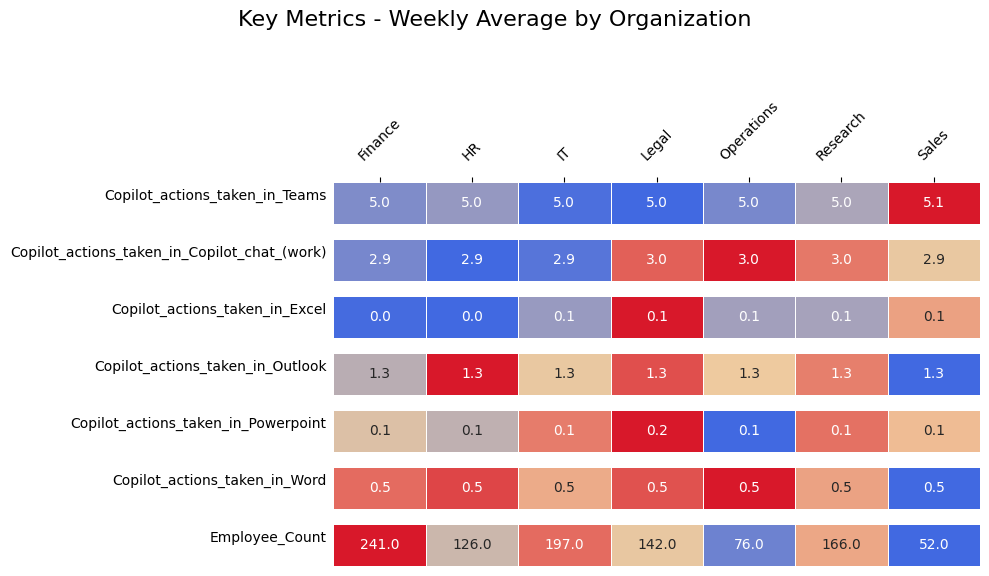

In [6]:
temp_plot = vi.keymetrics_scan(
    data=demo_pq,
    hrvar="Organization",
    metrics=metrics_cop_actions_taken_in,
    return_type="plot"
)

Key metrics scan: High vs Medium vs Low Copilot users                                              
Join user segments with Heavy Copilot users

<Figure size 1200x800 with 0 Axes>

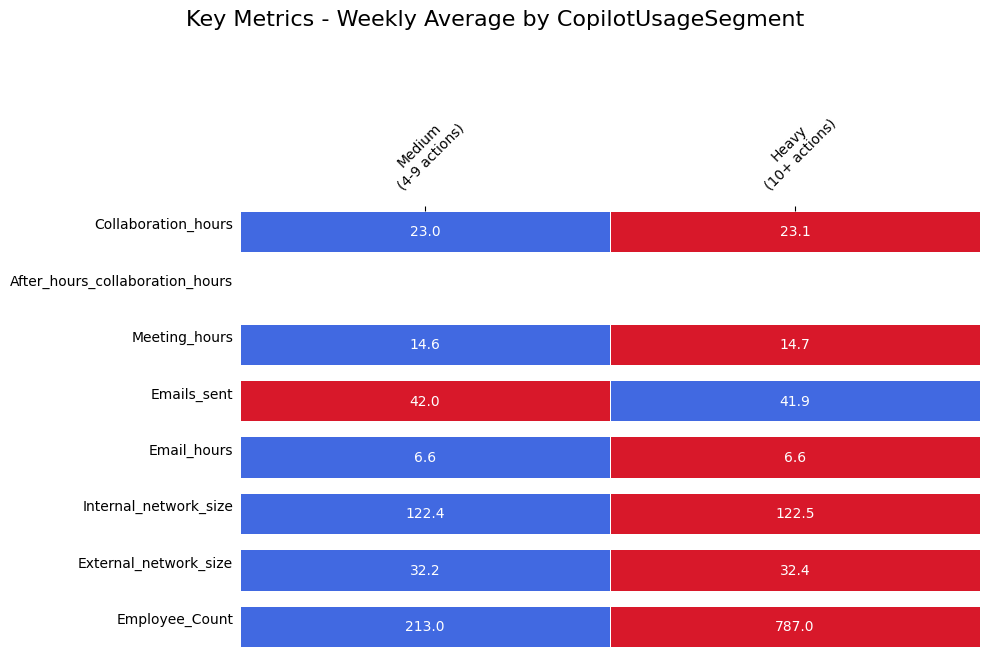

In [7]:

demo_pq["Total_Copilot_actions"] = demo_pq[metrics_cop_actions_taken_in].sum(axis=1)

tb_cop_usage_segments = (
    demo_pq.groupby("PersonId")["Total_Copilot_actions"]
    .mean()
    .reset_index()
    .assign(CopilotUsageSegment=lambda df: pd.cut(
        df["Total_Copilot_actions"],
        bins=[-1, 0, 3, 9, float('inf')],
        labels=["Non-user", "Low\n(1-3 actions)", "Medium\n(4-9 actions)", "Heavy\n(10+ actions)"]
    ))
)

temp_plot = vi.keymetrics_scan(
    data=demo_pq.merge(tb_cop_usage_segments, on="PersonId"),
    hrvar="CopilotUsageSegment",
    return_type="plot"
)

Boxplot - Copilot Assisted Hours                                                         
Create plot :

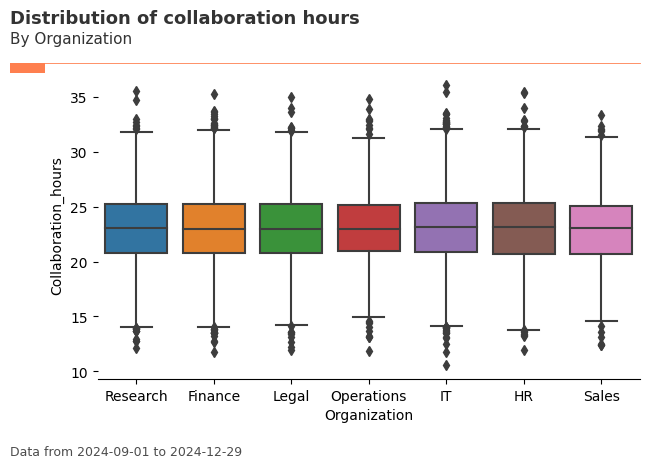

In [8]:
temp_plot = vi.create_boxplot(
    data=demo_pq,
    hrvar="Organization",
    metric="Collaboration_hours",
    return_type="plot"
)

Lorenz curve - Total Copilot actions                                                     
Create plot :

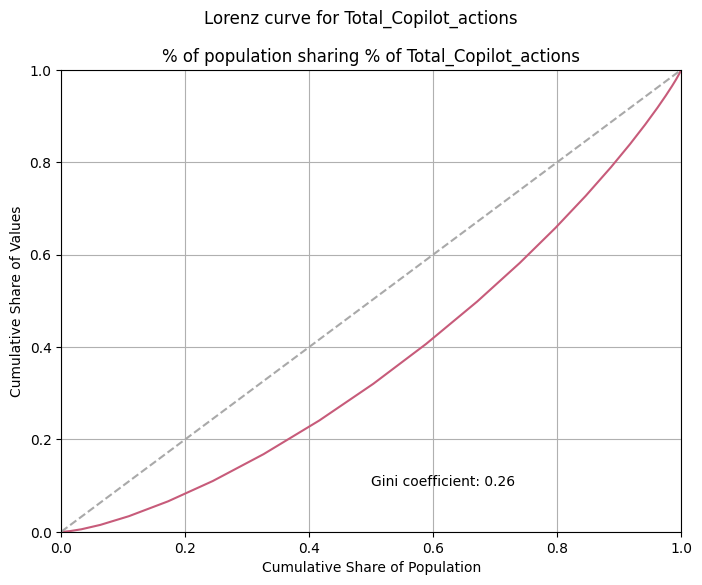

In [9]:
temp_plot = vi.create_lorenz(
    data=demo_pq,
    metric="Total_Copilot_actions",
    return_type="plot"
)

Cumulative share table

In [10]:
lorenz_table = vi.create_lorenz(
    data=demo_pq,
    metric="Total_Copilot_actions",
    return_type="table"
)

Ranked - Total Copilot Actions (Top and Bottom 10)

In [11]:
ranked_data = vi.create_rank(
    data=demo_pq,
    metric="Total_Copilot_actions",
    hrvar=["Organization"],
    return_type="table"
)
# Download the ranked data
# ranked_data.head(10).to_csv(output_dir / "top_10_copilot_actions.csv", index=False)
# ranked_data.tail(10).to_csv(output_dir / "bottom_10_copilot_actions.csv", index=False)

Information value - Heavy Copilot Users

In [12]:

tb_heavy_copilot_users = (
    demo_pq.groupby("PersonId")["Total_Copilot_actions"]
    .mean()
    .reset_index()
    .assign(HeavyCopilotUsers=lambda df: (df["Total_Copilot_actions"] >= 10).astype(int))
)

Information value - Heavy Copilot Users

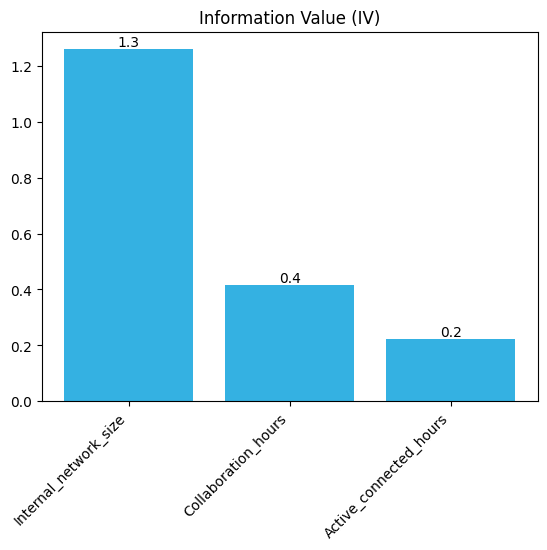

In [13]:
demo_pq["X"] = np.where(demo_pq["External_network_size"] > 40, 1, 0)
vi.create_IV(
    data=demo_pq.merge(tb_heavy_copilot_users, on="PersonId"),
    predictors=["Collaboration_hours",
        "Internal_network_size",
        "Emails_sent",
        "Active_connected_hours"],outcome="X",exc_sig=False, return_type="plot")